In [709]:
# Analytical Value of Q as found in Kippenberg's thesis
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

In [710]:
# Vacuum Wavelength of source
wvln = 1.51837  # micrometers
#wvln = 0.852359 # for quartz example given by buck, kimble 2003

# Gaussian Pulse Source parameters
freq = 1 / wvln
fcen = freq
print("Frequency = " + str(fcen))
# cen = 0.6496971259430409
df = 0.01

#n = 3.4483 + 1j * 1.0901e-13
# n = 1.45246 # quartz again
n = 1.44

# Setting real and complex permitivities, and material loss
# complexPerm = 0
# realPerm = 12
eps = np.power(n, 2)
#complexPerm = np.imag(eps)
#realPerm = np.real(eps)
#cond = 2 * np.pi * freq * complexPerm / realPerm # Meep takes a conductivity for the material loss.

# Refractive index and ratio with index outside resonator
# n = np.sqrt(realPerm)
q = n / 1

nrad = 1  # Set to 1 to get fundamental whispering gallery modes

# Which zero of the airy function we need
azs = special.ai_zeros(nrad)[0]
az = azs[nrad - 1]

# Schiller's Approximation
def m2r(x):
    return 1 / (2 * np.pi * freq) * (x + 1 / 2 + az * ((x + 1 / 2) / 2) ** (1 / 3) - q / np.sqrt(q ** 2 - 1)
                                     + 3 * az / (2 ** (2 / 3) * 10 * (x + 1 / 2) ** (1 / 3)) + q ** 3 * az
                                     / (3 * 2 ** (1 / 3) * (q ** 2 - 1) ** (3 / 2) * (x + 1 / 2) ** (2 / 3)))


def m2rvar(x):
    return 1 / (2 * np.pi * freq) * (x + az * (x / 2) ** (1 / 3) - q / np.sqrt(q ** 2 - 1)
                                     + 3 * az / (2 ** (2 / 3) * 10 * x ** (1 / 3)) + q ** 3 * az
                                     / (3 * 2 ** (1 / 3) * (q ** 2 - 1) ** (3 / 2) * x ** (2 / 3)))
# I think I'd suggested this based off going to a disk resonator based on something I saw in Acharyaa et al, but I'm not sure

def qkippenberg(x):
    # k = 2 * np.pi / 1530  # Fix this when i find out what they mean by k
    k = 0.1
    beta = ((x + 1 / 2) / 2) ** (1 / 3)
    Tnl = (x + 1 / 2) * (np.arccosh(nrad) - np.sqrt(1 - 1 / (q ** 2))) + beta * az * np.sqrt(1 - 1 / (q ** 2))
    return 1 / 2 * (x + 1 / 2 - beta * az - x ** (1 - 2 * k) / np.sqrt(x ** 2 - 1)) * x ** (-1 + 2 * k) * (
            x ** 2 - 1) ** (1 / 2) * np.exp(2 * Tnl)


def qbuck(x):
    b = 0  # TE modes
    xi = (1 / 2 * (x + 1 / 2)) ** (1 / 3)
    eta = np.arccosh(n * (1 - 1 / (x + 1 / 2) * (az * xi + x ** (1 - 2 * b) / np.sqrt(x ** 2 - 1))) ** (-1))
    Tl = (x + 1 / 2) * (eta - np.tanh(eta))
    return 1 / 2 * (x + 1 / 2) * n ** (1 - 2 * b) * (n ** 2 - 1) ** (1 / 2) * np.exp(2 * Tl)
# Buck checks out

# Size of resonator and waveguide, using schillers approx

#r = 1 / (2 * np.pi * freq) * (m + 1 / 2 + az * ((m + 1) / 3) ** (1 / 3)
#                              - q / np.sqrt(q ** 2 - 1) + 3 * az / (2 ** (2 / 3) * 10 * (m + 1 / 2) ** (1 / 3))
#                              + q ** 3 * az / (3 * 2 ** (1 / 3) * (q ** 2 - 1) ** (3 / 2) * (m + 1 / 2) ** (3 / 2)))


Frequency = 0.6586009997563176


In [711]:
# m = np.arange(10, 60, 1) # for 1550m
m = np.arange(10, 200, 1) # for 869nm
r = m2r(m)
Qrad = qbuck(m)

# Q = 1/(1/Qrad)

In [712]:
#Absorption Loss
alpha = 1e-10 #CaF2 at 0K cm^-1
alpha_mu = alpha * 1e-4
#alpha = 4.5e-4 # Silica m^-1
#alpha_mu = alpha * 1e-6 #attenuation per micron
Qabs = 2*np.pi*n/(alpha*wvln)
txt = "Q_abs = {:e}"
print(txt.format(Qabs))

#Surface scattering
sigma = 2       #Grudinin nm
B = 0.33 #Grudinin

sigmaB = sigma * B * 1e-6
#sigmaB = 5 * 1e-6#Buck Kimble et al. in nm^2


Qss = 3*eps*(eps+2)**2/((4*np.pi**3)*(eps-1)**(5/2)) * wvln**(7/2) * (2*r)**(1/2) /(sigmaB)**2

Q = 1/(1/Qrad + 1/Qabs + 1/Qss)


Q_abs = 5.958881e+10


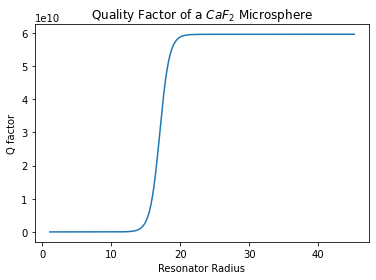

In [713]:
fig1, ax1 = plt.subplots()

ax1.plot(r, Q)
# ax1.plot(r, Qrad)
# ax1.plot([0,0], [Qabs,Qabs])
# ax1.plot(r, Qss)
# ax1.set_xlabel("Azimuthal mode number (m)")
ax1.set_xlabel("Resonator Radius")
ax1.set_ylabel("Q factor")

# ax1.set_yscale('log')
ax1.set_title(r"Quality Factor of a $CaF_2$ Microsphere")

plt.show()

In [714]:
#Mode Volume from Braginsky
V = 3.4 * np.pi**(3/2) * (wvln/(2*np.pi*n))**3 * m**(11/6)

# Not entirely sure what the Matematical expression in imble et al. is for the divergence of the mode volume as the resonator radius decreases.

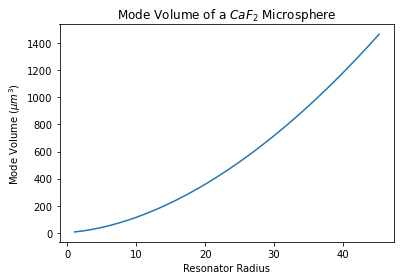

In [715]:
fig1, ax1 = plt.subplots()

ax1.plot(r, V)
# ax1.plot(r, Qrad)
# ax1.plot([0,0], [Qabs,Qabs])
# ax1.plot(r, Qss)
# ax1.set_xlabel("Azimuthal mode number (m)")
ax1.set_xlabel("Resonator Radius")
ax1.set_ylabel(r"Mode Volume $(\mu m^3)$ ")

#ax1.set_yscale('log')
ax1.set_title(r"Mode Volume of a $CaF_2$ Microsphere")

plt.show()

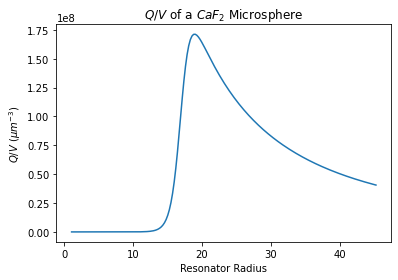

In [716]:
ratio = Q/V

fig1, ax1 = plt.subplots()

ax1.plot(r, ratio)
# ax1.plot(r, Qrad)
# ax1.plot([0,0], [Qabs,Qabs])
# ax1.plot(r, Qss)
# ax1.set_xlabel("Azimuthal mode number (m)")
ax1.set_xlabel("Resonator Radius")
ax1.set_ylabel(r"$Q/V$ $(\mu m^{-3})$")

#ax1.set_yscale('log')
ax1.set_title(r"$Q/V$ of a $CaF_2$ Microsphere")

plt.show()

In [717]:
max_ind = np.argmax(ratio)
print(r"Radius: {} microns, Mode Number: {}".format(r[max_ind],m[max_ind]))

Radius: 19.008071643692283 microns, Mode Number: 88
